green:  (173, 274)
blue:  (338, 274)


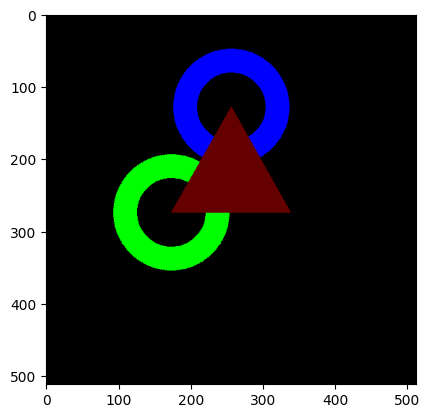

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

img = np.zeros((512,512,3), np.uint8)

circle_red = (0, 0, 255)
circle_green = (0, 255, 0)
circle_blue = (255, 0, 0)
textColor = (255, 255, 255)

# Параметры 
radius = 64
thickness = 32
space = 12

# Центры трёх окружностей
center_red = (256, 128)
center_green = (int(center_red[0]-radius-(thickness/5 )- space), center_red[1]+radius*2+int(thickness/5) + space)
center_blue = (int(center_red[0]+radius+(thickness /5)+ space), center_red[1]+radius*2+int(thickness/5)+ space)
print("green: ", center_green)
print("blue: ", center_blue)

point1 =  (center_red[0] +  radius * 2+thickness, center_red[1])
point2 = ( int((center_red[0] + center_blue[0]) / 2),
    int((center_red[1] + center_blue[1] ) / 2))

# Массивы точек 2-х треугольников (маски)
pts_mask1 = np.array([center_red, center_green, center_blue], np.int32)
pts_mask2 = np.array([point1, center_blue, point2], np.int32)

#Рисуем фигуры и накладываем маски
cv.ellipse(img, center_red, (radius, radius), 0, 0, 360, circle_red, thickness)
cv.ellipse(img, center_green, (radius, radius), 0, 0, 360, circle_green, thickness)
cv.fillPoly(img, [pts_mask1], (100, 0, 0))

plt.imshow(img)

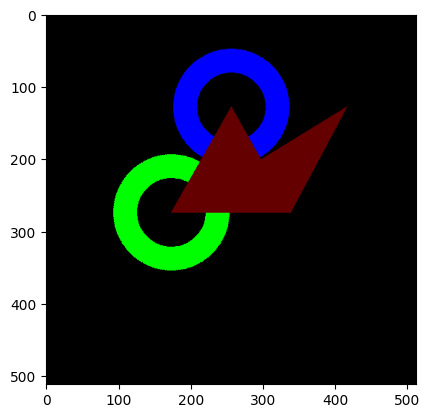

In [90]:
cv.fillPoly(img, [pts_mask2], (100, 0, 0))

plt.imshow(img)

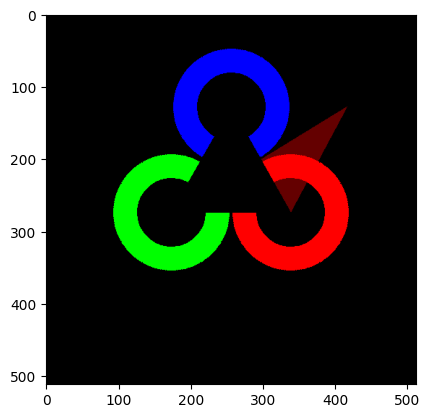

In [91]:
cv.ellipse(img, center_blue, (radius, radius), 0, 0, 360, circle_blue, thickness)
cv.fillPoly(img, [pts_mask1], (0, 0, 0))

plt.imshow(img)

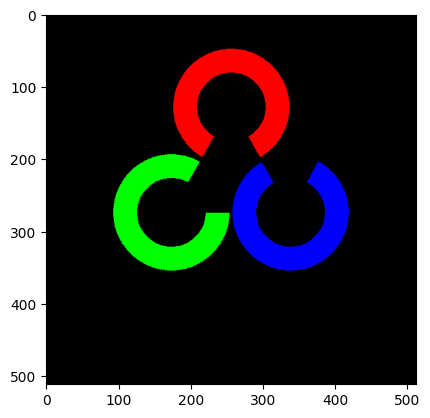

In [92]:
cv.fillPoly(img, [pts_mask1], (0, 0, 0))
cv.ellipse(img, center_blue, (radius, radius), 0, 0, 360, circle_blue, thickness)
cv.fillPoly(img, [pts_mask2], (0, 0, 0))



img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

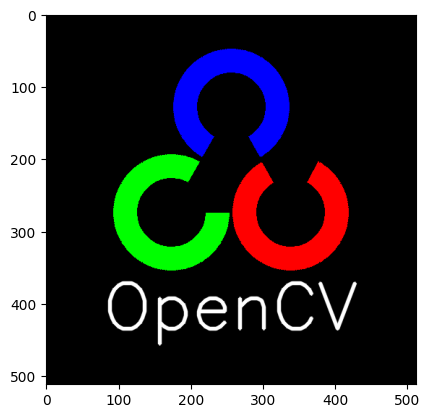

In [93]:
#Рисуем текст
font = cv.FONT_HERSHEY_SIMPLEX
text = "OpenCV"
text_size = cv.getTextSize(text, font, 3, 3)[0]

textX = (img.shape[1] - text_size[0]) // 2
textY = center_blue[1]+radius + thickness + text_size[1]

cv.putText(img, text, (textX, textY), font, 3, textColor, 3, cv.LINE_AA)

cv.imwrite("./open-cv-logo.jpg",img)

img = cv.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)